In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import os
from iob import style_transfer, utils

In [2]:
%cd ../

d:\dev\project\Neural-Style-Transfer


torch.Size([1, 3, 480, 512]) torch.Size([1, 3, 480, 512])


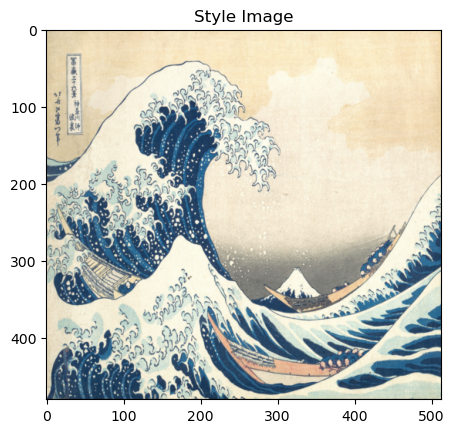

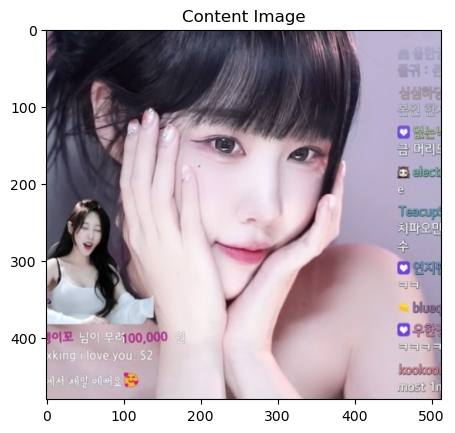

In [3]:
content_path = os.path.join(os.getcwd(), 'content_images')
style_path = os.path.join(os.getcwd(), 'style_images')
output_path = os.path.join(os.getcwd(), 'output_images')

content_img_name = "girl.jpg"
style_img_name = "tsunami.jpg"
ctin = content_img_name.split('.')[0]
stin = style_img_name.split('.')[0]

imsize = (480, 512)

content_img = utils.image_loader(os.path.join(content_path, content_img_name), imsize)
style_img = utils.image_loader(os.path.join(style_path, style_img_name), imsize)

print(style_img.size(), content_img.size())
assert style_img.size() == content_img.size(), \
    "Style and content images must be the same size"

plt.figure()
utils.imshow(style_img, title='Style Image')

plt.figure()
utils.imshow(content_img, title='Content Image')

In [4]:
content_img.shape

torch.Size([1, 3, 480, 512])

In [5]:
model = style_transfer.StyleTransfer()

output = model.run_style_transfer(os.path.join(content_path, content_img_name), os.path.join(style_path, style_img_name), imsize=imsize, num_steps=400, return_tensor=True)

d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 3, 480, 512]) torch.Size([1, 3, 480, 512])


d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1).to(device)


Optimizing...
Step 50: Style Loss: 0.001278 Content Loss: 14.676353
Step 100: Style Loss: 0.000148 Content Loss: 17.353985
Step 150: Style Loss: 0.000060 Content Loss: 15.501415
Step 200: Style Loss: 0.000038 Content Loss: 14.175526
Step 250: Style Loss: 0.000027 Content Loss: 13.642944
Step 300: Style Loss: 0.000021 Content Loss: 13.462386
Step 350: Style Loss: 0.000023 Content Loss: 13.267705
Step 400: Style Loss: 0.000016 Content Loss: 13.187407


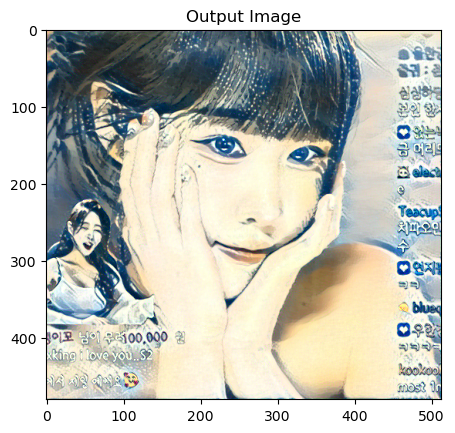

In [6]:
plt.figure()
utils.imshow(output, title='Output Image')
plt.ioff()
plt.show()

In [7]:
content_img.shape, output.shape

(torch.Size([1, 3, 480, 512]), torch.Size([1, 3, 480, 512]))

In [8]:
# %pip install -U Pillow

In [9]:
original_color_output = utils.preserve_color_lab(content_img, output)
original_color_output = utils.image_unloader(original_color_output)
original_color_output.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}.jpg'))
# plt.figure()
# utils.imshow(original_color_output, title='Output Image')
# plt.ioff()
# plt.show()